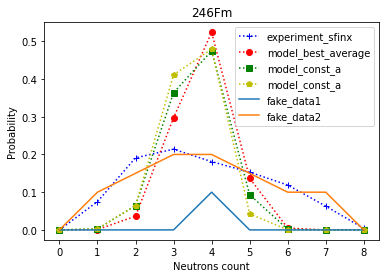

KstestResult(statistic=0.7777777777777778, pvalue=0.006293706293706292)
KstestResult(statistic=0.4444444444444444, pvalue=0.35170711641299873)
KstestResult(statistic=0.4444444444444444, pvalue=0.35170711641299873)
KstestResult(statistic=0.4444444444444444, pvalue=0.35170711641299873)
KstestResult(statistic=0.2222222222222222, pvalue=0.9894693541752365)
KstestResult(statistic=0.0, pvalue=1.0)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
        
x = np.asarray([0,
                1, 
                2, 
                3, 
                4, 
                5, 
                6, 
                7, 
                8])
experiment_sfinx = np.asarray([0, 
                               0.075, 
                               0.191, 
                               0.214, 
                               0.181, 
                               0.153, 
                               0.119, 
                               0.063, 
                               0.004])
model_best_average = np.asarray([0, 
                                 0.000981469247789, 
                                 0.036295527115418, 
                                 0.297116498126063, 
                                 0.523862925878301, 
                                 0.136787200106033, 
                                 0.004955856204289, 
                                 5.23e-07, 
                                 0])
model_const_a = np.asarray([0, 
                            0.00275513650467692, 
                            0.0642697727768682, 
                            0.363509675971298, 
                            0.474408878006353, 
                            0.093345482522875,
                            0.00170846992062599,
                            2.58429730325327e-06,
                            0])
model_new_shell_corr = np.asarray([0,
                                   0.00256620189912815,
                                   0.0644684040640992,
                                   0.411013930899054,
                                   0.479079176708237,
                                   0.0427068424548669,
                                   0.000165443816015288,
                                   1.58599463483046e-10,
                                   0])
fake_data1 = np.asarray([0, 0, 0, 0, 0.1, 0, 0, 0, 0])
fake_data2 = np.asarray([0, 0.1, 0.15, 0.2, 0.2, 0.15, 0.1, 0.1, 0.0])
    
plt.plot(x,experiment_sfinx,'b+:',label='experiment_sfinx')
plt.plot(x,model_best_average,'ro:',label='model_best_average')
plt.plot(x,model_const_a,'gs:',label='model_const_a')
plt.plot(x,model_new_shell_corr,'yp:',label='model_const_a')
plt.plot(x,fake_data1,label='fake_data1')
plt.plot(x,fake_data2,label='fake_data2')
plt.legend()
plt.title('246Fm')
plt.xlabel('Neutrons count')
plt.ylabel('Probability')
plt.show()

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
models = [fake_data1, model_best_average, model_const_a, model_new_shell_corr, fake_data2, experiment_sfinx]
for model in models:
    print(ks_2samp(experiment_sfinx, model))
